In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import numpy as np

import sys
import os
# Current working directory in Jupyter Notebook
project_root = os.getcwd()  # Current working directory
project_root = os.path.join(project_root, '..')  # Move one level up to the root
sys.path.append(project_root)
# from importlib import reload
# import utils.custom
# reload(utils.custom)
from utils.custom import calculate_metrics, plot_returns
from definitions.constants import  DATE_GS_CUTOFF
from definitions.constants_V import SINGLE_RUN_STOCK_DICT_PKL_V, SINGLE_RUN_RETURNS_PKL_V

with open(SINGLE_RUN_RETURNS_PKL_V, 'rb') as f:
    returns = pickle.load(f)


In [10]:
with open(SINGLE_RUN_STOCK_DICT_PKL_V, 'rb') as f:
    dictt = pickle.load(f)

dictt

{'2007-01-31': array([], dtype=float64),
 '2007-02-28': array([], dtype=float64),
 '2007-03-30': array([], dtype=float64),
 '2007-04-30': array([], dtype=float64),
 '2007-05-31': array(['GOOG', 'GE', 'AAPL'], dtype=object),
 '2007-06-29': array([], dtype=float64),
 '2007-07-31': array([], dtype=float64),
 '2007-08-31': array([], dtype=float64),
 '2007-09-28': array(['CSCO', 'INTC', 'OIH'], dtype=object),
 '2007-10-31': array([], dtype=float64),
 '2007-11-30': array(['MSFT', 'DBC', 'GSG'], dtype=object),
 '2007-12-31': array([], dtype=float64),
 '2008-01-31': array(['VNQ', 'MSFT', 'DBA'], dtype=object),
 '2008-02-29': array(['VNQ', 'GSG', 'DBC'], dtype=object),
 '2008-03-31': array(['GS', 'VNQ', 'GE'], dtype=object),
 '2008-04-30': array([], dtype=float64),
 '2008-05-30': array(['GOOG', 'GS', 'VNQ'], dtype=object),
 '2008-06-30': array(['GOOG', 'GS', 'OIH'], dtype=object),
 '2008-07-31': array([], dtype=float64),
 '2008-08-29': array(['GS', 'VNQ', 'XLE'], dtype=object),
 '2008-09-30': a

In [11]:
# dictt
filtered_keys = {k: v for k, v in dictt.items() if k > DATE_GS_CUTOFF}
filtered_keys

{'2018-01-31': array(['AMZN', 'TSLA', 'BAC'], dtype=object),
 '2018-02-28': array([], dtype=float64),
 '2018-03-29': array([], dtype=float64),
 '2018-04-30': array([], dtype=float64),
 '2018-05-31': array([], dtype=float64),
 '2018-06-29': array([], dtype=float64),
 '2018-07-31': array(['BAC', 'MSFT', 'TSLA'], dtype=object),
 '2018-08-31': array([], dtype=float64),
 '2018-09-28': array([], dtype=float64),
 '2018-10-31': array([], dtype=float64),
 '2018-11-30': array([], dtype=float64),
 '2018-12-31': array(['TSLA', 'AMZN', 'GLD'], dtype=object),
 '2019-01-31': array(['FB', 'NFLX', 'BABA'], dtype=object),
 '2019-02-28': array(['FB', 'NFLX', 'BABA'], dtype=object),
 '2019-03-29': array(['NFLX', 'FB', 'BABA'], dtype=object),
 '2019-04-30': array(['FB', 'NFLX', 'BABA'], dtype=object),
 '2019-05-31': array([], dtype=float64),
 '2019-06-28': array([], dtype=float64),
 '2019-07-31': array([], dtype=float64),
 '2019-08-30': array([], dtype=float64),
 '2019-09-30': array([], dtype=float64),
 '2

In [12]:
xiv_count = 0

# Iterate through the dictionary values
for date, tickers in dictt.items():
    if 'XIV' in tickers:
        xiv_count += 1

print(f"The stock ticker 'XIV' appears {xiv_count} times in the dictionary.")

The stock ticker 'XIV' appears 0 times in the dictionary.


/tmp/ipykernel_1095728/4187050076.py:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'XIV' in tickers:


In [13]:
returns[returns.index > '2018-01-01'].head(10)

2018-01-31    2.256507
2018-02-28    0.000000
2018-03-29    0.000000
2018-04-30    0.000000
2018-05-31    0.000000
2018-06-29    0.000000
2018-07-31    0.681085
2018-08-31    0.000000
2018-09-28    0.000000
2018-10-31    0.000000
dtype: float64

In [14]:
annual_return, sharpe_ratio, max_drawdown_value, calmar_ratio, sortino_ratio = calculate_metrics(returns=returns)#[(returns.index>'2009-01-01')]
# Print results
print(f"Annual Return: {annual_return * 100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Max Drawdown: {max_drawdown_value * 100:.2f}%")
print(f"Calmar Ratio: {calmar_ratio:.2f}")
print(f"Sortino Ratio: {sortino_ratio:.2f}")

Annual Return: 18.11%
Sharpe Ratio: 0.73
Max Drawdown: 36.02%
Calmar Ratio: 0.50
Sortino Ratio: 1.19


In [15]:
annual_return, sharpe_ratio, max_drawdown_value, calmar_ratio, sortino_ratio = calculate_metrics(returns=returns[(returns.index<=DATE_GS_CUTOFF)])#&(returns.index>'2009-01-01')

# Print results
print(f"Annual Return: {annual_return * 100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Max Drawdown: {max_drawdown_value * 100:.2f}%")
print(f"Calmar Ratio: {calmar_ratio:.2f}")
print(f"Sortino Ratio: {sortino_ratio:.2f}")

Annual Return: 19.17%
Sharpe Ratio: 0.76
Max Drawdown: 36.02%
Calmar Ratio: 0.53
Sortino Ratio: 1.41


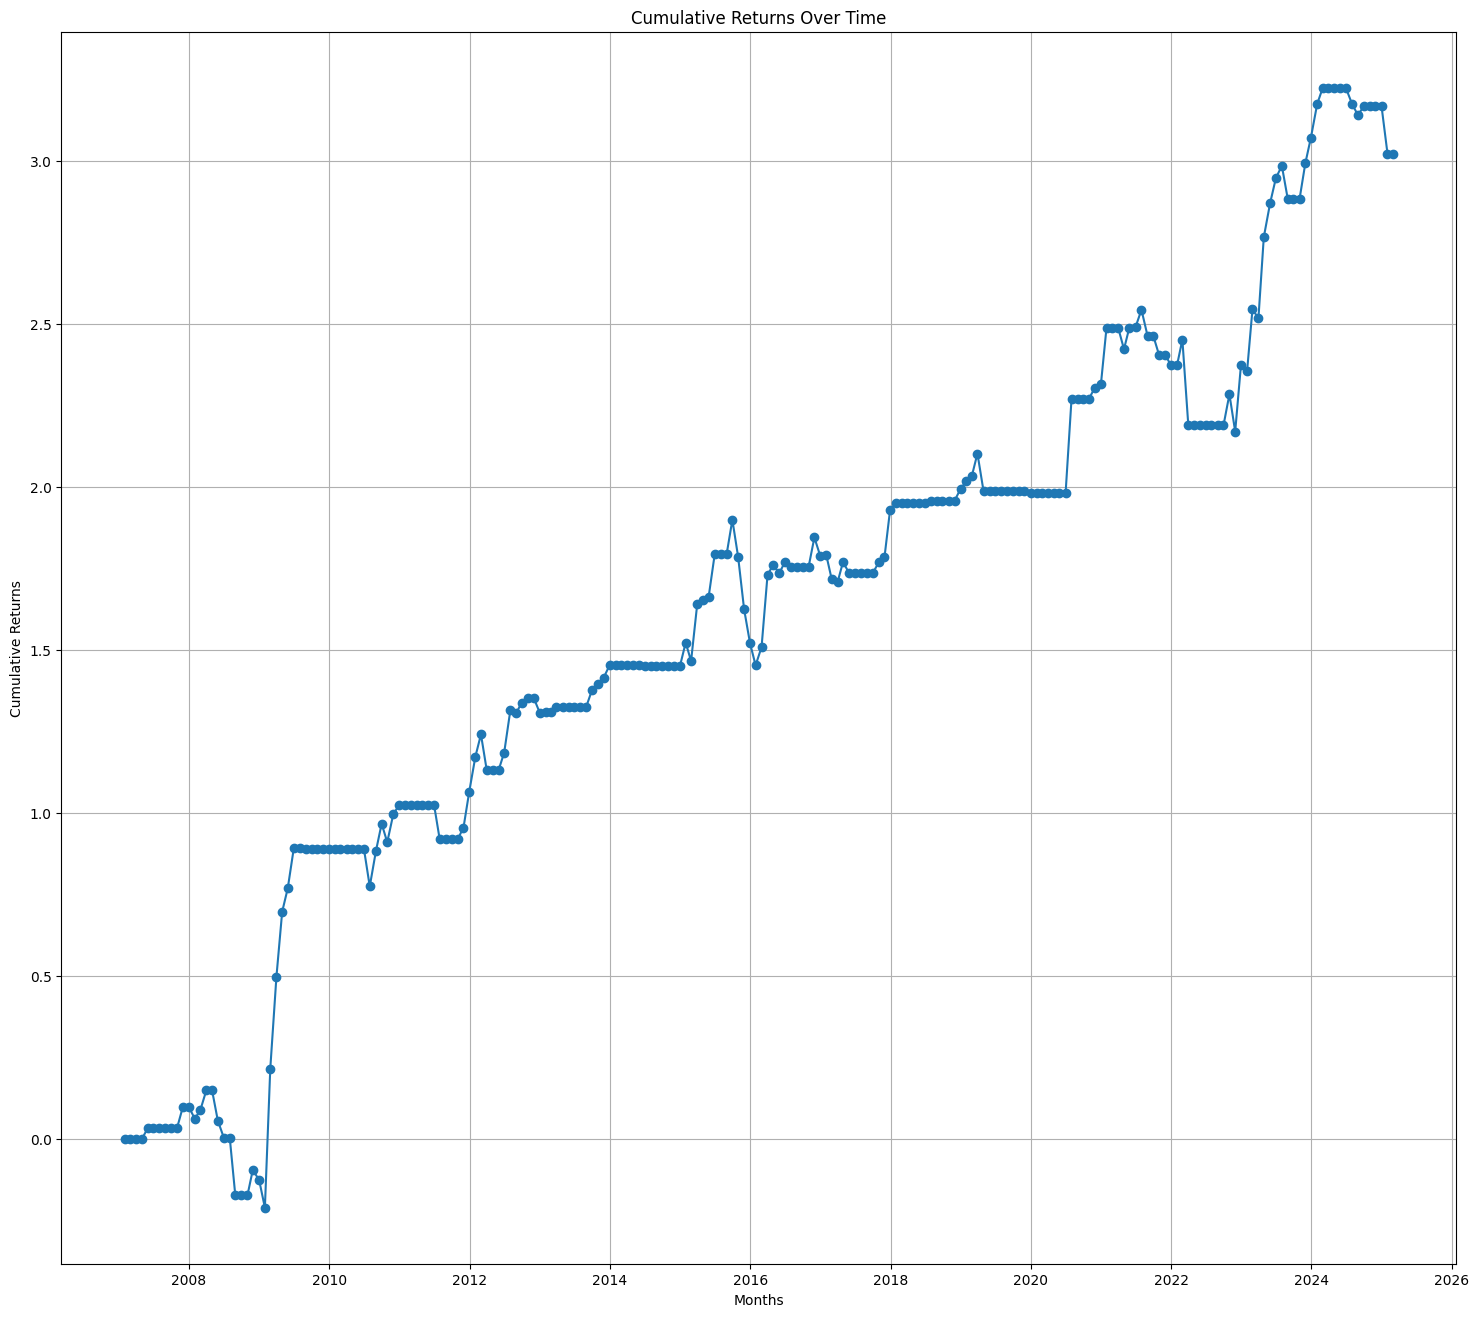

In [16]:
plot_returns(returns=returns)